In [1]:
## TP2 Big Data ##

## Parte I ##
#Importamos libreria
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Importamos los datos
data = pd.read_csv("C:/Users/tomas/Documents/UdeSA/Cuarto Año/Primer Cuatri/Big Data/TP2/Base Airbnb NY.csv")

In [2]:
# 1) a) Sacamos los datos duplicados (por id)
data.drop_duplicates(subset='id', inplace=True)

In [3]:
# 1) b) Sacamos columnas que no agreguen informacion
data.drop(columns=['name', 'host_name'], inplace=True)

In [4]:
# 1) c) Nos fijamos los missing values de cada columna
missing_values = data.isna().sum()
print(missing_values)

data['reviews_per_month'].fillna(0, inplace=True)

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


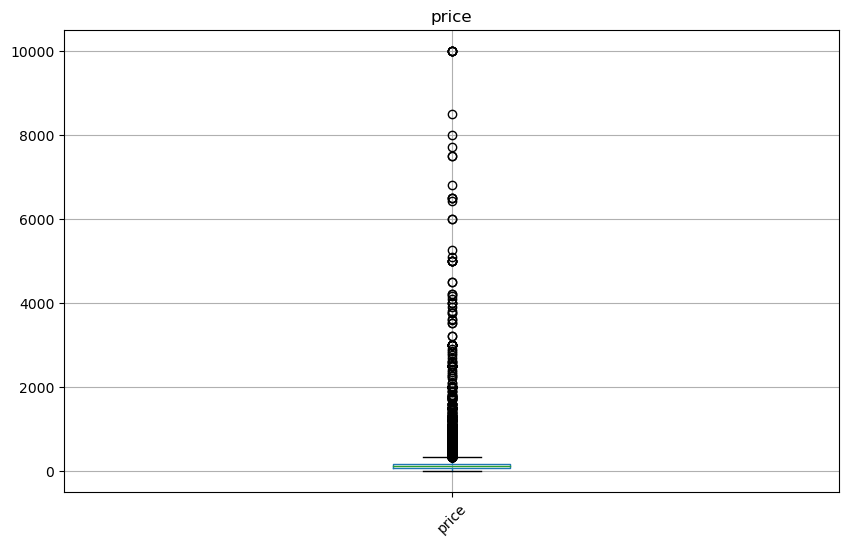

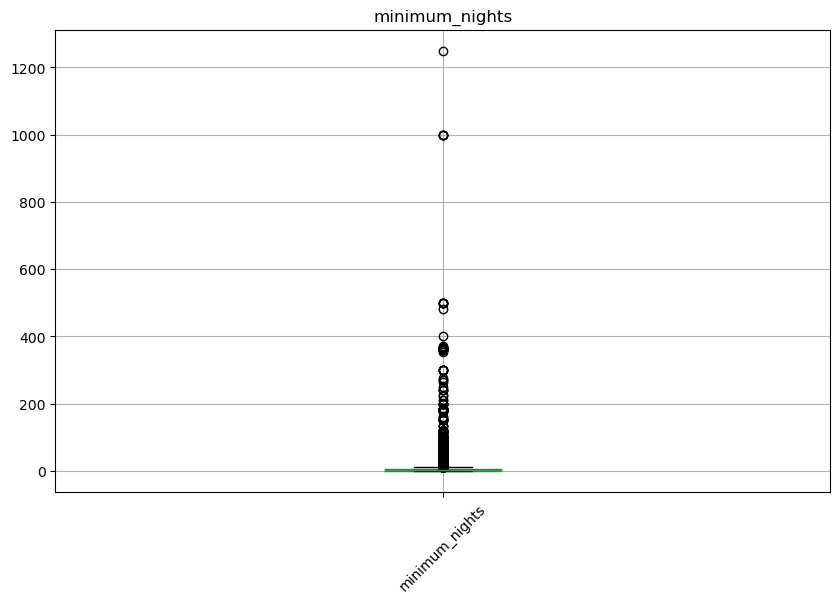

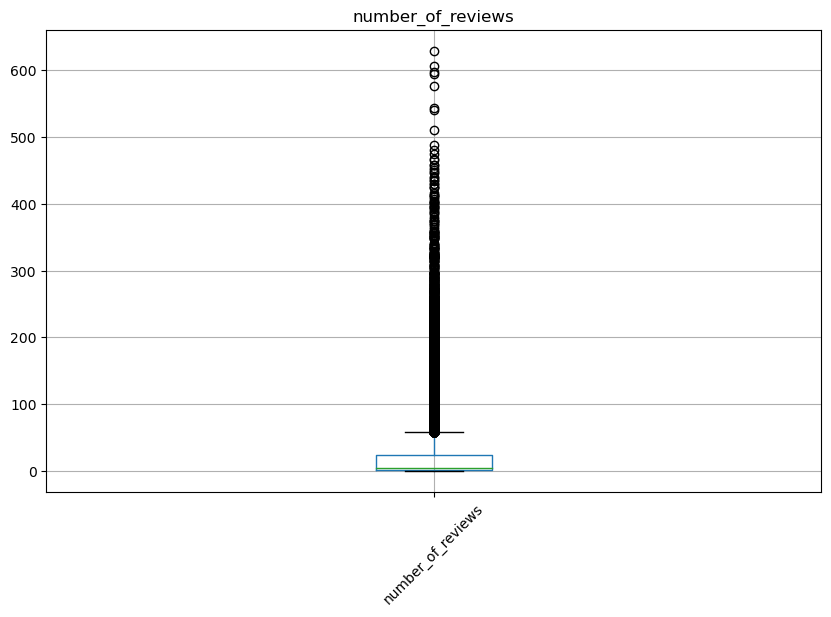

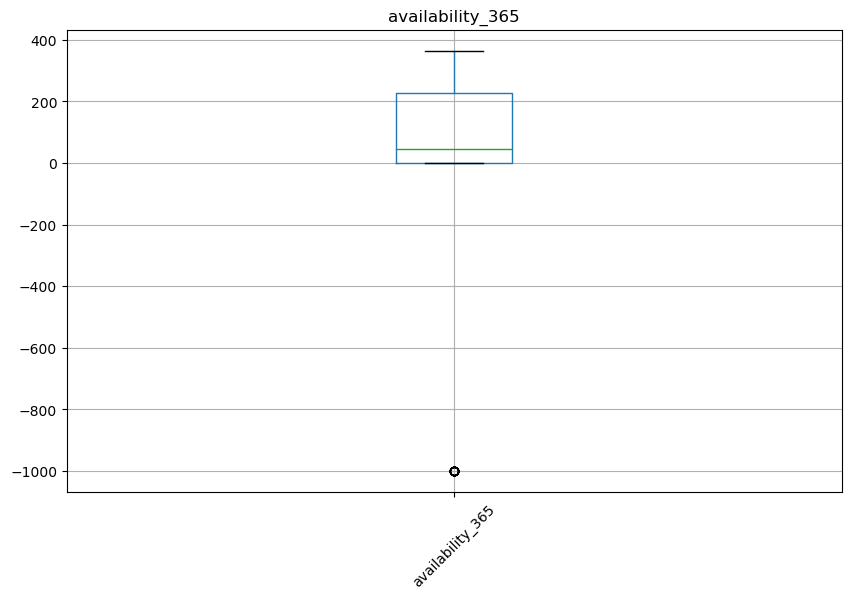

In [5]:
# 1) d) Graficamos datos numericos para encontrar outliers 

columnas_numericas = ['price', 'minimum_nights' , 'number_of_reviews', 'availability_365']

for i in range(0, len(columnas_numericas)):   
    plt.figure(figsize = (10, 6))
    data.boxplot(column = columnas_numericas[i])
    plt.title(columnas_numericas[i])
    plt.xticks(rotation = 45)
    plt.show()

#Eliminamos columnas con precio = 0

data = data[data['price'] != 0]

#Eliminamos columnas con minimum_nights >= 900

data = data[data['minimum_nights'] < 900]

#Filtramos por availability_365 positiva

data = data[data['availability_365'] > 0]

In [6]:
# 1) e) Transformar neighborhood_group y room_type a numericas

# Creamos dummies para cada neighborhood distinto 
dummy_cols = pd.get_dummies(data['neighbourhood_group'], prefix='neighbourhood_').astype(int)

# Concatenar las variables dummy al DataFrame original
data = pd.concat([data, dummy_cols], axis=1)

#Repetimos proceso para room_type

# Creamos dummies para cada tipo de cuarto distinto 
dummy_cols_room = pd.get_dummies(data['room_type'], prefix='room_type_').astype(int)

# Concatenar las variables dummy al DataFrame original
data = pd.concat([data, dummy_cols_room], axis=1)

In [7]:
# 1) f) Cantidad de ofertas por zona

#Agrupamos por barrio y contamos observaciones
group_counts = data.groupby('neighbourhood_group').size()

#Guardamos informacion en offer_group
offer_group = pd.DataFrame({'neighbourhood_group': group_counts.index, 'offer_group': group_counts.values})

#Juntamos ambos datasets 
data = pd.merge(data, offer_group, on='neighbourhood_group', how='left')

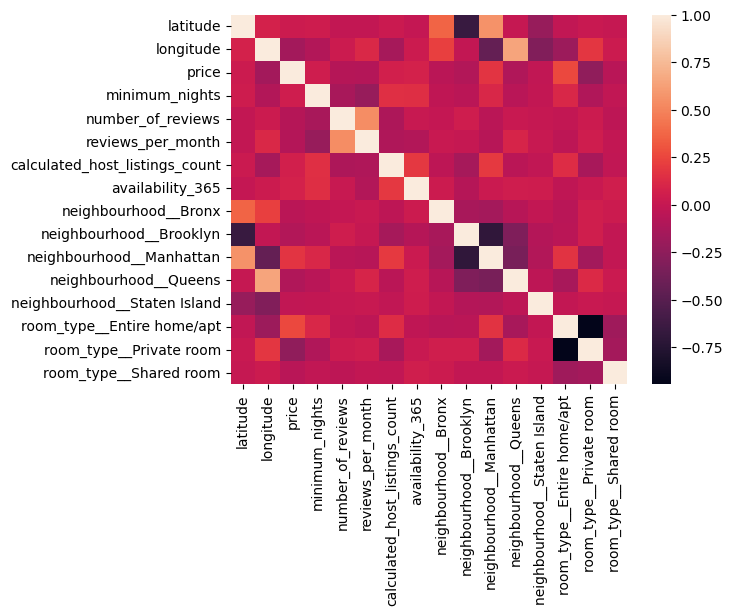

In [8]:
## Parte II ##

# 1) Correlograma

#Nos quedamos con las variables de interes 

#Eliminamos neighbourhood_group y room_type
data_corr = data.drop(columns=['neighbourhood_group', 'room_type'])

columns_to_keep = ['latitude', 'longitude', 'price', 'minimum_nights', 
                   'number_of_reviews', 'reviews_per_month', 
                   'calculated_host_listings_count', 'availability_365']

#Inclumos las dummies
dummies_neighbourhood = [col for col in data.columns if col.startswith('neighbourhood_')]
dummies_room_type = [col for col in data.columns if col.startswith('room_type_')]

#Juntamos lista de columnas a utilizar
columns_corr = columns_to_keep + dummies_neighbourhood + dummies_room_type

data_corr = data[columns_corr].drop(columns=['neighbourhood_group'])

#Computamos las correlaciones y graficamos
correlaciones = sns.heatmap(data_corr.corr())

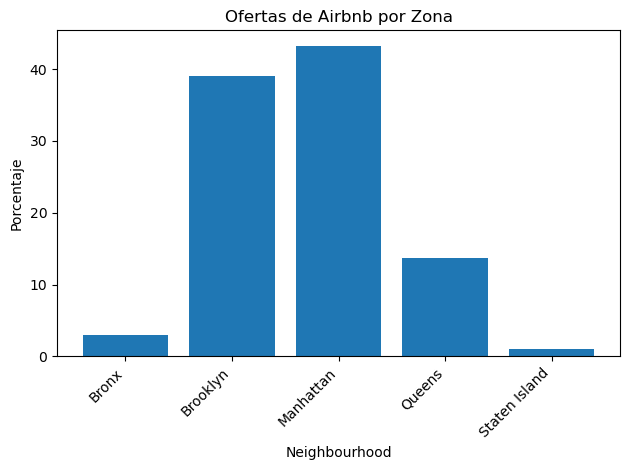

In [9]:
# 2) Cantidad de oferentes por categoria

group_counts = group_counts.to_frame().reset_index()
cols = group_counts.columns

group_counts.rename(columns={'neighbourhood_group': 'neighbourhood', cols[1]: 'count'}, inplace=True)

#Cambiamos valores a porcentajes
suma = group_counts['count'].sum()

group_counts['percent'] = (group_counts['count']/suma)*100

plt.bar(group_counts['neighbourhood'], group_counts['percent'])
plt.xlabel('Neighbourhood')
plt.ylabel('Porcentaje')
plt.title('Ofertas de Airbnb por Zona')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

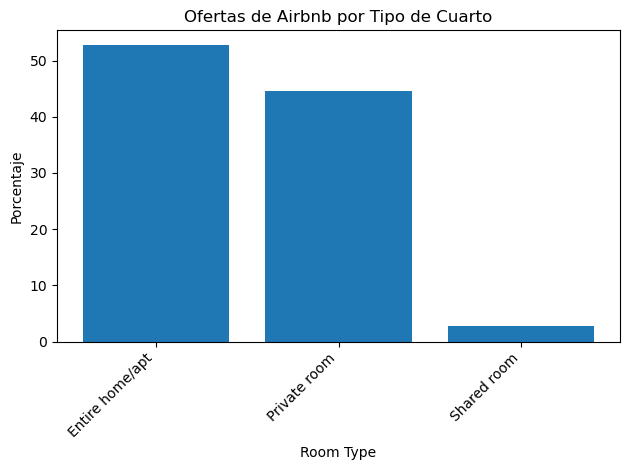

In [10]:
#Repetimos para tipo de cuarto. Primero creamos el dataset con el count por tipo de cuarto

#Agrupamos por room type y contamos observaciones
group_room = data.groupby('room_type').size()

group_room = group_room.to_frame().reset_index()

cols_room = group_room.columns

group_room.rename(columns={cols_room[1]: 'count'}, inplace=True)

#Cambiamos valores a porcentajes
suma_room = group_room['count'].sum()

group_room['percent'] = (group_room['count']/suma_room)*100

plt.bar(group_room['room_type'], group_room['percent'])
plt.xlabel('Room Type')
plt.ylabel('Porcentaje')
plt.title('Ofertas de Airbnb por Tipo de Cuarto')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

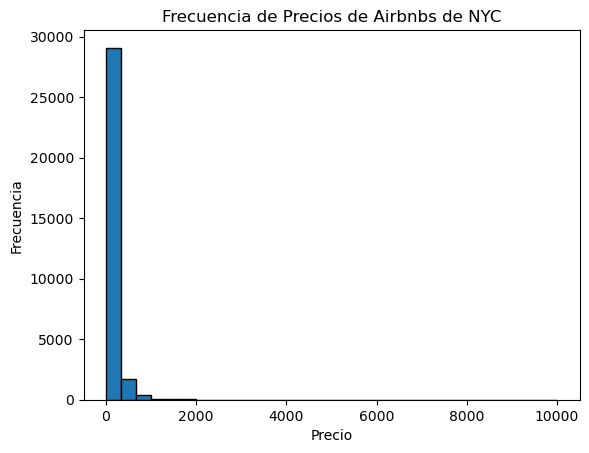

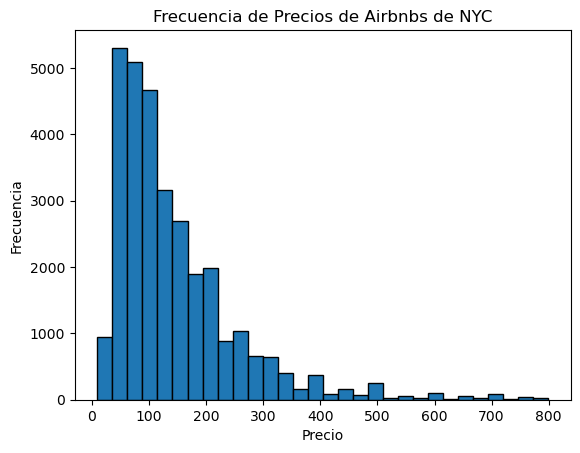

In [11]:
# 3) Histograma de precios

plt.hist(data['price'], bins=30, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Precios de Airbnbs de NYC')
plt.show()

#Histograma con precio < 800
pr = data[data['price'] < 800]

plt.hist(pr['price'], bins=30, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Precios de Airbnbs de NYC')
plt.show()

In [12]:
#Buscamos el minimo, maximo y promedio del precio
precio_min = data['price'].min()
precio_max = data['price'].max()
precio_medio = data['price'].mean()

In [13]:
#Promedio de precio por barrio y por tipo de cuarto
precio_barrio = data.groupby('neighbourhood_group')['price'].mean()
precio_cuarto = data.groupby('room_type')['price'].mean()

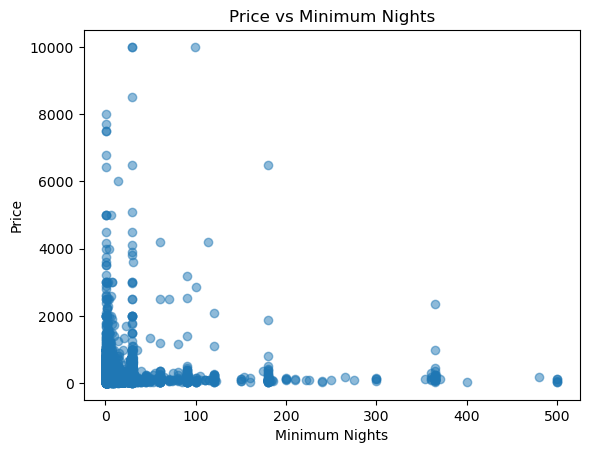

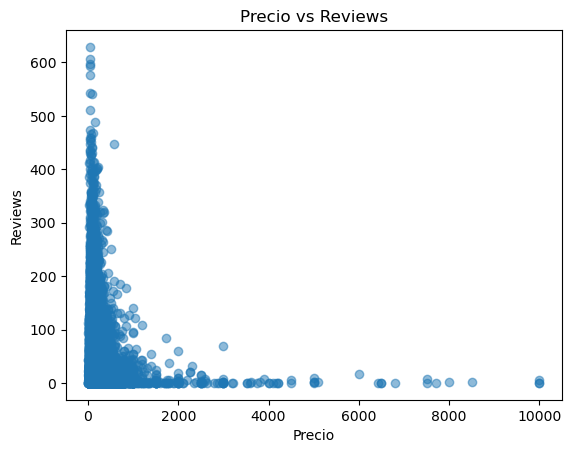

In [14]:
# 4) Scatterplots 

# price vs minnimun_nights
plt.scatter(data['minimum_nights'], data['price'], alpha=0.5)
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Price vs Minimum Nights')
plt.show()

# precio vs reviews
plt.scatter(data['price'], data['number_of_reviews'], alpha = 0.5)
plt.xlabel('Precio')
plt.ylabel('Reviews')
plt.title('Precio vs Reviews')
plt.show()

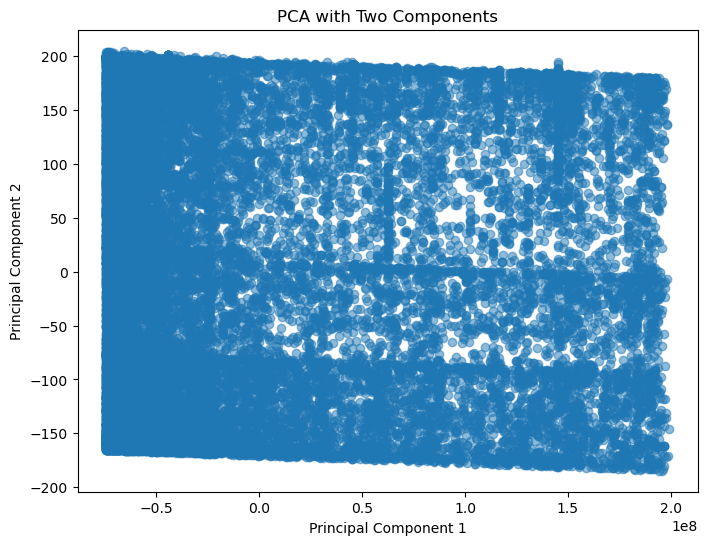

In [15]:
# 5) PCA 

data.dropna(inplace = True)

# Extract features (X) and target (y)
X = data.drop(columns = ['neighbourhood_group', 'room_type', 'neighbourhood',
                       'id', 'last_review', 'offer_group', 'price'])

pca = PCA(n_components = 2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.figure(figsize = (8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha = 0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Two Components')
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_

In [16]:
## Parte III ##

data_corr.dropna(inplace = True)

# 1) Separacion de datos por variable
y = data_corr['price']
X = data_corr.drop(columns = ['price'])

In [17]:
# 2) Division de datos en test/train 
X['intercept'] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

In [18]:
# 3) Regresion Lineal con train dataset
model = LinearRegression()

model.fit(X_train, y_train)

# Hacemos la prediccion
y_pred = model.predict(X_test)

# Calculamos los errores
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)